# Homework 4: Oscillatory Systems
Physics 177, Spring 2017 (Prof. Tanedo)  
Due: Tuesday, May 7  

*Henry Casarez*
This was a bit of a sad hw assignment. For Problem 2 I couldn't get the code for part b and c to work. Something about "math odmain errors" whatever that means. But! I did my best. Here's to it!

If there are issues with the homework, please [e-mail Prof. Tanedo](mailto:flip.tanedo@ucr.edu) before the weekend. 

**Useful links:**
* Keyboard shortcuts for Jupyter: https://gist.github.com/kidpixo/f4318f8c8143adee5b40

## Problem 1: Simple Pendulum vs. Error Accumulation

The equations of motion for the simple pendulum are:  

$\displaystyle \dot{\theta} = +\, \omega$  
$\displaystyle \dot{\omega} = -\frac{g}{\ell}\sin\theta$  

Write these as:  

$\displaystyle \dot{\theta} = f(\theta,\omega,t)$  
$\displaystyle \dot{\omega} = h(\theta,\omega,t)$  

The pendulum has length $\ell$, angle $\theta$ with respect to the vertical, angular velocity $\omega$, and gravitational acceleration at sea level is $g = 9.8$ m/s$^2$.

**Reminder**: Recall that the Runge-Kutta algorithm for solvine $\dot x = f(x,t)$ is to loop the following sequence of steps:  
`k1 = dt*f(x,t)`  
`k2 = dt*f(x + 0.5*k1, t + 0.5*dt)`  
`x += k2`

### 1.a Code this up

Following our example in Lecture 9, code a function `time_and_theta(ell, theta_0)` that outputs two Numpy arrays:  
1. an array of time slices
2. an array of associated $\theta$ values

In other words, the outputs of `time_and_theta(ell, theta_0)` are the required inputs for `matplotlib` to plot the trajectory. Use the Runge-Kutta algorithm to integrate the differential equations. Use MKS units, so that `g = 9.8`.

**Hint**: It is <a href="http://stackoverflow.com/a/930398/4812646">useful to know</a> that you can access the last element of a list using `[-1]` as an index. For example: if `some_list` is `[1,2,3]`, then `some_list[-1]` gives `-3`.

**Remark**: We're using global variables again. This isn't always a good practice, but it will be convenient.

In [254]:
import numpy as np
import matplotlib.pyplot as plt
from math import sin as sin

# CONSTANTS
g = 9.8    

# PARAMETERS
ell = 1.0      # length of pendulum arm
theta_0 = 2.0  # initial displacement in radians
               # Note: this is *not* a small angle
omega_0 = 0.0  # initial angular velocity
dt = 0.01      # time sampling spacing
t_final = 10.0 # total number of seconds to run

def f(theta, omega, t):
    """d(theta)/dt"""
    return omega # FIX THIS
    
def h(theta, omega, t):
    """d(omega)/dt"""
    return -1*(g/ell)*np.sin(theta) # FIX THIS

# TIME SLICES (depends on dt and t_final)
tpoints = np.arange(0, t_final, dt)

def time_and_angles():
    """
    Returns three Numpy arrays: 
    1. a list of time samples 
    2. a list of theta values
    3. a list of omega values
    No arguments (these are all assumed to be global variables)
    """
    
    theta_points = []
    omega_points = []
    
    # Initialize theta, omega
    theta = theta_0 # FIX THIS
    omega = omega_0 # FIX THIS
    
    for t in tpoints:
        
        # Record theta, omega
        theta_points.append(theta)
        omega_points.append(omega)
            
        # Time step using Runge-Kutta
        ## FILL THIS IN
        k1 = dt*f(theta_points[-1],omega_points[-1],t)
        k2 = dt*f(theta_points[-1] + .5*k1,omega_points[-1]+ .5 *k1, t + .5*dt)
        theta += k2 # FIX THIS
        
        ## FILL THIS IN
        k1 = dt * h(theta_points[-1],omega_points[-1],t)
        k2 = dt*h(theta_points[-1] + .5*k1,omega_points[-1]+ .5 *k1, t + .5*dt)
        omega += k2 # FIX THIS
        
        # Note: the arguments of f(...) and h(...) should use 
        # theta_points[-1] and omega_points[-1].
        #
        # This is to ensure that you update theta and omega simultaneously. 
        # For example, if you were doing Euler (correct):
        # omega(i+1) = omega(i) + dt*f(theta(i), omega(i), t)
        #
        # versus (incorrect)
        # omega(i+1) = omega(i) + dt*f(theta(i+1), omega(i), t)

    tt = np.array(tpoints)
    thetas = np.array(theta_points)
    omegas = np.array(omega_points)
    
    return tt, thetas, omegas

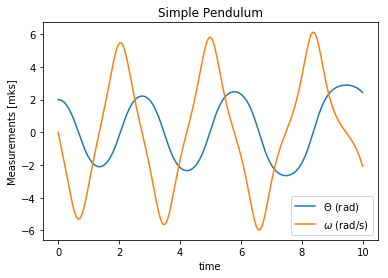

In [255]:
# Test the above code:
times, thetas, omegas = time_and_angles()

plt.plot(times, thetas, label='$\Theta$ (rad)')
plt.plot(times, omegas, label='$\omega$ (rad/s)')
plt.title("Simple Pendulum")
plt.xlabel('time')
plt.ylabel('Measurements [mks]')
plt.legend()
plt.show()

Your code above should produce:
<img src="HW4_simple_pendulum.png">

### 1.b Phase Space

Using your code (or rewriting it if necessary) from Problem 1.a, plot the **phase space trajectory** of the simple pendulum over the range 0 to 10 seconds with the initial conditiosn above. A phase space diagram has $\theta$ on the horizontal axis and momentum on the vertical axis. You may assume that the pendulum weight has unit mass. 

(In the units where `g=9.8`, what does "unit mass" mean?)

**Explain what's going on.** The result may surprise you. But then you'll remember the discussion we had at the end of Lecture 9 about energy conservation and the propagation of errors. Start by explaining what kind of physics diagram you expect to see (based on physics), and then explain why this diagram looks different.

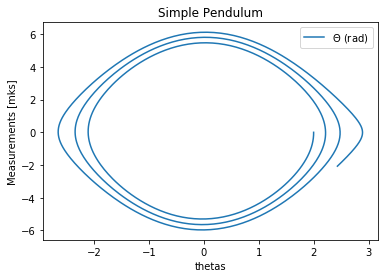

In [256]:
times, thetas, omegas = time_and_angles()

plt.plot(thetas,omegas, label='$\Theta$ (rad)')

plt.title("Simple Pendulum")
plt.xlabel('thetas')
plt.ylabel('Measurements [mks]')
plt.legend()
plt.show()

### The pendulum is slowly going away and decreasing in both theta and omega magnitude. There should be a conservation of energy but this shows that there actually is some energy that goes away.

### 1.c Plot of Energy with Respect to Time

The energy of the simple pendulum is  

$\displaystyle E = \frac{1}{2} m \ell^2 \omega^2 + m g \ell \left(1-\cos\theta\right)$

**Hint:** Numpy arrays are "built" for being manipulated as mathematical objects. Thus it may be useful to observe the following operations:

In [257]:
test_numpy_array=np.array([3.14,1.55])
np.cos(test_numpy_array)

array([-0.99999873,  0.02079483])

In [258]:
test_numpy_array**2

array([ 9.8596,  2.4025])

Using the outputs of your code from Problem 1.a, create a Numpy array of energy at each time step and plot energy as a function of time. Refer to your answer to Problem 1.b and explain what's going on. From physical principles, what do you *expect* this plot to look like (e.g. if you were taking measurements of an actual simple pendulum).

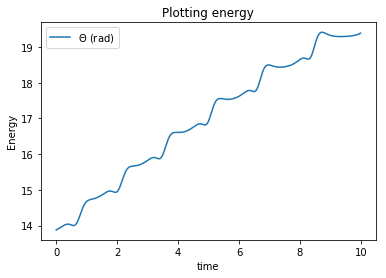

In [259]:
m = 1.0

energy = (.5*m*(ell**2)*(omegas**2))+(m*g*ell*(1-np.cos(thetas)))

plt.plot( times, energy, label='$\Theta$ (rad)')

plt.title("Plotting energy")
plt.xlabel('time')
plt.ylabel('Energy')
plt.legend()
plt.show()

### 1.d Time-reversal symmetry in Runge-Kutta

As we discussed in lecture, the weird behavior observed in Problems 1.b and 1.c (and that are barely visible in the plot from 1.a) are due to the Runge-Kutta algorithm breaking time-reversal invariance. This means that total energy drifts, and we argued that the drift is positive definite. If you didn't observe this, go back and fix your answers to 1.b and 1.c right now. 

It is useful to know that given an array, `some_array`, you can produce the same array in the "reverse order" using `some_array[::-1]`.

Use your code exisiting code to redo the *same* simple pendulum system, except whith `theta_0` set to the *final* value (`thetas[-1]`), `omega_0` set to the *final* value (`omegas[-1]`), and `dt` set to be negative (`dt = -0.01`). You'll have to also reverse the `tpoints` array of time samples. 

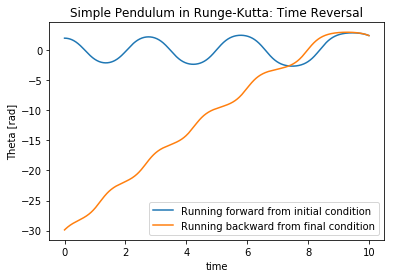

In [260]:
theta_0 = thetas[-1]
omega_0 = omegas[-1] # FIX THIS
dt = -0.01 # FIX THIS )

# we want tpoints to be the "reverse" of what it was in problem 1.a
# so that the last time step appears first, and t=0 appears last
tpoints = times[::-1] # FIX THIS

# Now we just run the *same* code from problem 1.a
back_times, back_thetas, back_omegas = time_and_angles()

tpoints = np.arange(0, t_final, dt)

def time_and_angles():
    """
    Returns three Numpy arrays: 
    1. a list of time samples 
    2. a list of theta values
    3. a list of omega values
    No arguments (these are all assumed to be global variables)
    """
    
    theta_points = []
    omega_points = []
    
    # Initialize theta, omega
    theta = theta_0 # FIX THIS
    omega = omega_0 # FIX THIS
    
    for t in tpoints:
        
        # Record theta, omega
        theta_points.append(theta)
        omega_points.append(omega)
            
        # Time step using Runge-Kutta
        ## FILL THIS IN
        k1 = dt*f(theta_points[-1],omega_points[-1],t)
        k2 = dt*f(theta_points[-1] + .5*k1,omega_points[-1]+ .5 *k1, t + .5*dt)
        theta += k2 # FIX THIS
        
        ## FILL THIS IN
        k1 = dt * h(theta_points[-1],omega_points[-1],t)
        k2 = dt*h(theta_points[-1] + .5*k1,omega_points[-1]+ .5 *k1, t + .5*dt)
        omega += k2 # FIX THIS
        
        # Note: the arguments of f(...) and h(...) should use 
        # theta_points[-1] and omega_points[-1].
        #
        # This is to ensure that you update theta and omega simultaneously. 
        # For example, if you were doing Euler (correct):
        # omega(i+1) = omega(i) + dt*f(theta(i), omega(i), t)
        #
        # versus (incorrect)
        # omega(i+1) = omega(i) + dt*f(theta(i+1), omega(i), t)

    tt = np.array(tpoints)
    thetas = np.array(theta_points)
    omegas = np.array(omega_points)
    
    return tt, thetas, omegas


# CLEAN UP
# (Return global values back to their original values)
dt = 0.01  
tpoints = np.arange(0, t_final, abs(dt))

# Compare plots
plt.plot(times, thetas, label='Running forward from initial condition')
plt.plot(back_times, back_thetas, label='Running backward from final condition')
plt.title("Simple Pendulum in Runge-Kutta: Time Reversal")
plt.xlabel('time')
plt.ylabel('Theta [rad]')
plt.legend()
plt.show()

### 1.e Leap-Frog to the Rescue

Use the leap-frog algorithm described in class to re-code `time_and_angles()`. Recall that at each step of leapfrog, you have `x[i]` and `x[i+1/2` and do the following:

1. `x[i+1]` is defined as `x[i]` plus a correction whose slop comes from `f(x,t)` evaluated at `x[i+1/2]` and `t[i+1/2]`.
2. `x[i+3/2]` is defined as `x[i+1/2]` plus a correction whose slop comes from `f(x,t)` evaluated at `x[i+1]` and `t[i+1]`.

In [261]:
def time_and_angles_leapfrog():
    """
    Returns three Numpy arrays: 
    1. a list of time samples 
    2. a list of theta values
    3. a list of omega values
    No arguments (these are all assumed to be global variables)
    Uses leap-frog algorithm
    """
    # CONSTANTS
    g = 9.8    

    # PARAMETERS
    ell = 1.0      # length of pendulum arm
    theta_0 = 2.0  # initial displacement in radians
               # Note: this is *not* a small angle
    omega_0 = 0.0  # initial angular velocity
    dt = 0.01      # time sampling spacing
    t_final = 10.0 # total number of seconds to run

    
    theta_points = []
    omega_points = []
    
    # Initialize theta, omega
    theta = theta_0
    omega = omega_0
    
    # Initialize theta, omega "+1/2"
    theta_half = theta_0 + .5*dt*f(theta_0, omega_0,0) # FILL THIS IN USING ONE STEP OF THE EULER METHOD
    omega_half = omega_0 + .5*dt*h(theta_0, omega_0,0) # FILL THIS IN USING ONE STEP OF THE EULER METHOD
    
    
    for t in tpoints:
        # Record theta, omega
        theta_points.append(theta)
        omega_points.append(omega)
            
        # Time step using Leap-Frog
       
        theta += dt*f(theta_half,omega_half, t+ .5*dt)
        theta_half += dt*f(theta, omega, t+dt)
    
        omega += dt*h( theta_half, omega_half, t+ .5*dt)
        omega_half += dt*h(theta, omega, t+dt)
     
        # FILL THIS IN
        
    tt = np.array(tpoints)
    thetas = np.array(theta_points)
    omegas = np.array(omega_points)
    
    return tt, thetas, omegas

# Test the above code:
times, thetas_lf, omegas_lf = time_and_angles_leapfrog()

### 1.f Leap-Frog Plots

Using the leap-frog data generated in problem 1.e, remake the plots you have made earlier in this problem showing both the Runge-Kutta result and the Leap-Frog results simultaneously on each plot.

You shouldn't have to re-generate any of the data.

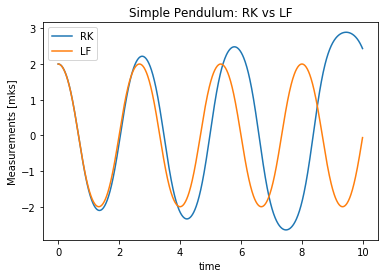

In [262]:
plt.plot(times, thetas , label='RK')
plt.plot(times, thetas_lf , label='LF')
plt.title("Simple Pendulum: RK vs LF")
plt.xlabel('time')
plt.ylabel('Measurements [mks]')
plt.legend()
plt.show()

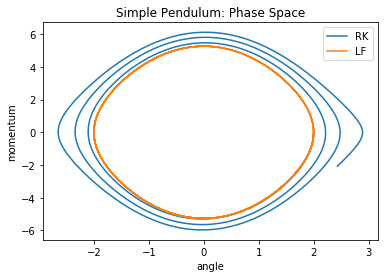

In [263]:
plt.plot(thetas, omegas , label='RK')
plt.plot(thetas_lf, omegas_lf , label='LF')
plt.title("Simple Pendulum: Phase Space")
plt.xlabel('angle')
plt.ylabel('momentum')
plt.legend()
plt.show()

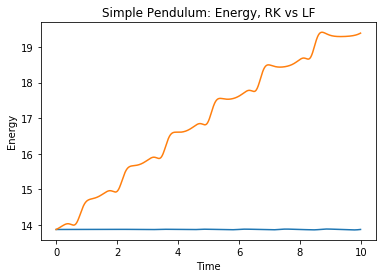

In [264]:
m = 1.0

energies_lf = (.5*m*(ell**2)*(omegas_lf**2))+(m*g*ell*(1-np.cos(thetas_lf)))
plt.plot( times, energies_lf, label='LF')
plt.plot(times,energy  , label='RK')
plt.title("Simple Pendulum: Energy, RK vs LF")
plt.xlabel('Time')
plt.ylabel('Energy')
plt.show()

### 1.g Leap-Frog Time Reversal Symmetry

Re-do problem 1.d using Leap-Frog. Plot the amplitude as a function of time for:
1. the original Runge-Kutta data (from 1.a)
2. the time-reversed Runge-Kutta data (from 1.d)
3. the original Leap-Frog data (from 1.3)
4. the time-reversed Leap-Frog data

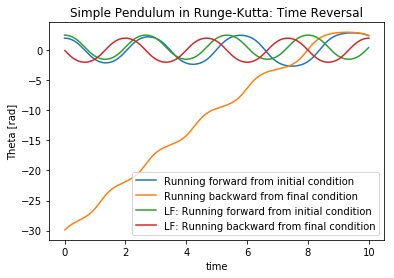

In [265]:
theta_0 = thetas_lf[-1]# FILL THIS IN (use the  "_lf" data)
omega_0 = omegas_lf[-1] # FILL THIS IN (use the  "_lf" data)
dt = -.01 # FILL THIS IN

# old set of time samples, you want tpoints to be the "reverse" of this
tpoints = np.arange(t_final,0, dt)# FILL THIS IN, we want it time-reversed

back_times, back_thetas_lf, back_omegas_lf = time_and_angles_leapfrog()

# CLEAN UP
# (Return global values back to their original values)
dt = 0.01  
tpoints = np.arange(0, t_final, abs(dt))

# Define a small offset so that you can see lines
# that would otherwise be overlapping
OFFSET = 0.5

# Compare plots
plt.plot(times, thetas, label='Running forward from initial condition')
plt.plot(back_times, back_thetas, label='Running backward from final condition')
plt.plot(times, thetas_lf + OFFSET, label='LF: Running forward from initial condition')
plt.plot(back_times, back_thetas_lf, label='LF: Running backward from final condition')
plt.title("Simple Pendulum in Runge-Kutta: Time Reversal")
plt.xlabel('time')
plt.ylabel('Theta [rad]')
plt.legend() 
plt.show()

## Problem 2: Not-So Simple Pendula

Using the same initial conditions as in Problem 1, copy and paste ("<a href="http://knowyourmeme.com/memes/copypasta">copy-pasta</a>") your code from Problem 1.e and adapt it to a not-so simple pendulum.

### Problem 2.a

Include the following forces:
* Damping force, with damping coefficient `q_damp`
* Driving force with amplitude `F_drive` and frequency `omega_drive`
* Drag force with air density `rho`, drac coefficient `C_drag` and some `area`

Make sure that the forces are pointed in the right direction! (If your code isn't stable because your velocity gets huge, this might be way.)

Set `t_final` to 20 seconds. Set `q_damp = 0.1`, `F_drive = 1.4`, and `omega_drive = 1.0`. Assume that the bob has radius .1 (what's the area?), and that the drag coefficient is 1.0. What's a reasonable value for the density of air? (What units are we using?)

Plot the results.

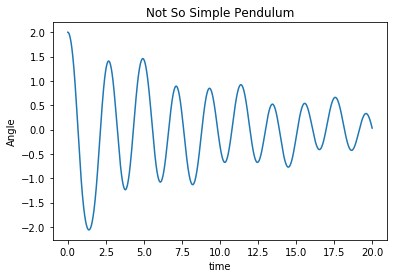

In [291]:
from math import pi as pi
t_final = 20 # FILL THIS IN
dt = .01
tpoints = np.arange(0, t_final, dt)

# FILL IN THE PARAMETERS OF THE NEW FORCES HERE
# CONSTANTS
g = 9.8    

# PARAMETERS
ell = 1.0      # length of pendulum arm
theta_0 = 2.0  # initial displacement in radians
               # Note: this is *not* a small angle
omega_0 = 0.0  # initial angular velocity
dt = 0.01      # time sampling spacing
t_final = 10.0 # total number of seconds to run
dragconst=1.0
rho = 1.225
q_damp = .1
F_drive = 1.4
omega_drive = 1.0

# Redefine h to include other forces
def h(theta,omega,t):
    """d(omega)/dt, in the presence of other stuff"""
    SHO = -1*(g/ell)*sin(theta) # FILL IN Simple Harmonic Oscillator here
    
    friction = -1*q_damp*omega # FILL IN friction force
    
    drive = -1*F_drive *sin(omega_drive*t) # FILL IN driving force
    
    drag = -.5*rho*dragconst*omega*abs(omega)*(pi*.1**2) # FILL IN drag force
    
    return SHO + friction + drive + drag

times, thetas_real, omegas_real = time_and_angles_leapfrog()
plt.plot(times, thetas_real)
plt.title("Not So Simple Pendulum")
plt.xlabel('time')
plt.ylabel('Angle')
plt.show()

### Problem 2.b

Set `t_final` to 50 seconds and `dt` to 0.001. Turn off the driving force. Approximately how long does it take for the amplitude of the oscillation to decrease to 0.25 radians?

In [295]:
from math import pi as pi
from math import sin as sin
t_final = 50 # FILL THIS IN
dt = .001

tpoints = np.arange(0, t_final, dt)

# FILL IN THE PARAMETERS OF THE NEW FORCES HERE
# CONSTANTS
g = 9.8    

# PARAMETERS
ell = 1.0      # length of pendulum arm
theta_0 = 2.0  # initial displacement in radians
               # Note: this is *not* a small angle
omega_0 = 0.0  # initial angular velocity
dt = 0.01      # time sampling spacing
t_final = 10.0 # total number of seconds to run

q_damp = .1
F_drive = 0
omega_drive = 1.0
# Redefine h to include other forces
def h(theta,omega,t):
    """d(omega)/dt, in the presence of other stuff"""
    SHO = -1*(g/ell)*sin(theta) # FILL IN Simple Harmonic Oscillator here
    
    friction = -1*q_damp*omega # FILL IN friction force
    
    #drive = -1*F_drive *sin(omega_drive*t) # FILL IN driving force
    
    drag = -.5*rho*dragconst*omega*abs(omega)*(pi*.1**2) # FILL IN drag force
    
    
    return SHO + friction + drag

times, thetas_real, omegas_real = time_and_angles_leapfrog()
plt.plot(times, thetas_real)
plt.title("Not So Simple Pendulum")
plt.xlabel('time')
plt.ylabel('Angle')
plt.show()

ValueError: math domain error

### Problem 2.c 

Plot the trajectory in Problem 2.b in phase space.

In [296]:
## FILL THIStimes, thetas, omegas = time_and_angles()
times, thetas_real, omegas_real = time_and_angles_leapfrog()
plt.plot(thetas_real,omegas_real)

plt.title("Not So Simple Pendulum")
plt.xlabel('thetas')
plt.ylabel('Measurements [mks]')
plt.legend()
plt.show() 

ValueError: math domain error

## Addendum: How to animate

In class we brought up the question of how to get inline animations in Jupyter. The answer turns out to be a little subtle. 

The key is to use  
`%matplotlib notebook`

See:
http://stackoverflow.com/questions/43445103/inline-animations-in-jupyter/43447370

Note: this affects all of the cells, so you might want to use  
`%matplotlib inline`
for other cells without animation. (Otherwise they look weird to me)

<IPython.core.display.Javascript object>


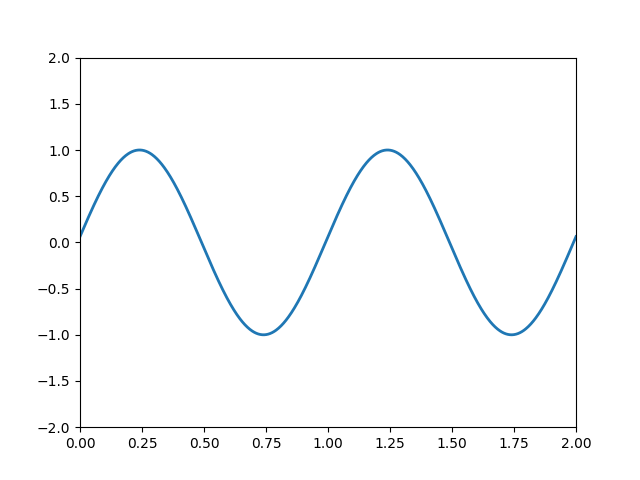

In [1]:
# EXAMPLE:

%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

# animation function. This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

HTML(anim.to_html5_video())